In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

Load and convert iris dataset (to pandas dataframe)

In [13]:
iris = datasets.load_iris()    
print(iris.target_names)
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df['target'] = pd.Series(iris.target)
df[:3]

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


<Axes: xlabel='sepal width (cm)', ylabel='Count'>

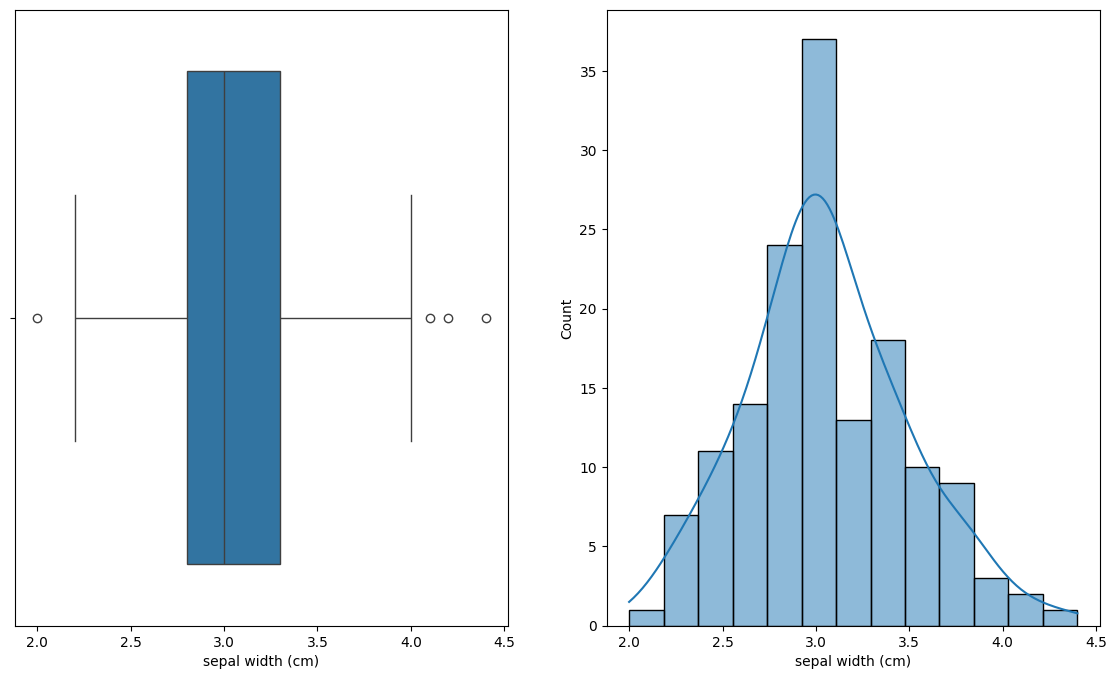

In [15]:
plt.figure(figsize=(12, 2))

plt.subplot(1, 2, 1)
sns.boxplot(data = df, x = df.columns[1]) #for outliers

plt.subplot(1, 2, 2)
sns.histplot(data = df, x = df.columns[1], kde = True)

In [25]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Function that associates targets with their target names

In [338]:
def f(x):
    if x == 0:
        val = iris.target_names[0]
    elif x == 1:
        val = iris.target_names[1]
    elif x == 2:
        val = iris.target_names[2]

    return val

df['species'] = df['target'].apply(f)
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa


Number of entries each target

target
0    50
1    50
2    50
Name: count, dtype: int64


Text(0.5, 1.0, 'target count')

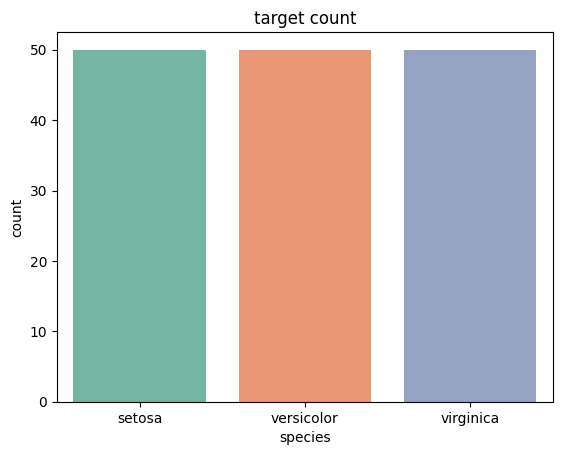

In [339]:
print(df['target'].value_counts())
sns.countplot(x='species', data=df, palette='Set2', hue='species', legend=False)

plt.title('target count')

Nell'attività di analisi delle feature è importante determinare eventuali correlazioni, utili per una eventuale fase di feature selection.
Pandas fornisce la funzione corr() che ricava, per ogni coppia di features, la correlazione ricavata con una dei seguenti coefficienti (o indici di correlazione):

 - pearson : standard correlation (default)
 - kendall : Kendall Tau correlation
 - spearman : Spearman rank correlation

Pearson è un coefficiente di correlazione lineare e restituisce un valore in [-1,1] dove

 - +1 corrisponde alla perfetta correlazione lineare positiva
 - 0 assenza di correlazione lineare
 - −1 perfetta correlazione lineare negativa

È definito come: la covarianza 1/N sum(x_i-x_medio)(y_i-y_medio), divisa per il prodotto delle deviazioni standard delle due variabili.
Se le due variabili sono indipendenti si ha 0. Ma non vale il contrario: se una variabile è la potenza di un'altra, si ha comunque 0.

<Axes: title={'center': 'features correlation'}>

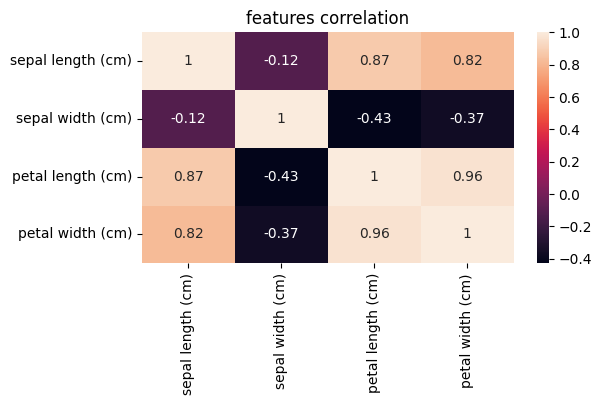

In [340]:
#df without theese two features (species and target)
df_corr = df.drop(columns=['species', 'target'])

plt.figure(figsize=(6,3))
plt.title('features correlation')
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
sns.heatmap(df_corr.corr(), annot=True) #uses Pearson correlation

La larghezza e la lunghezza dei sepali non sono correlate. La larghezza e la lunghezza dei petali sono altamente correlate
Proveramo a usare tutte le caratteristiche per addestrare l'algoritmo e verificare l'accuratezza

Oltre a media e stddev valutata per le singole caratteristiche, è interessante visualizzarle e confrontarle.

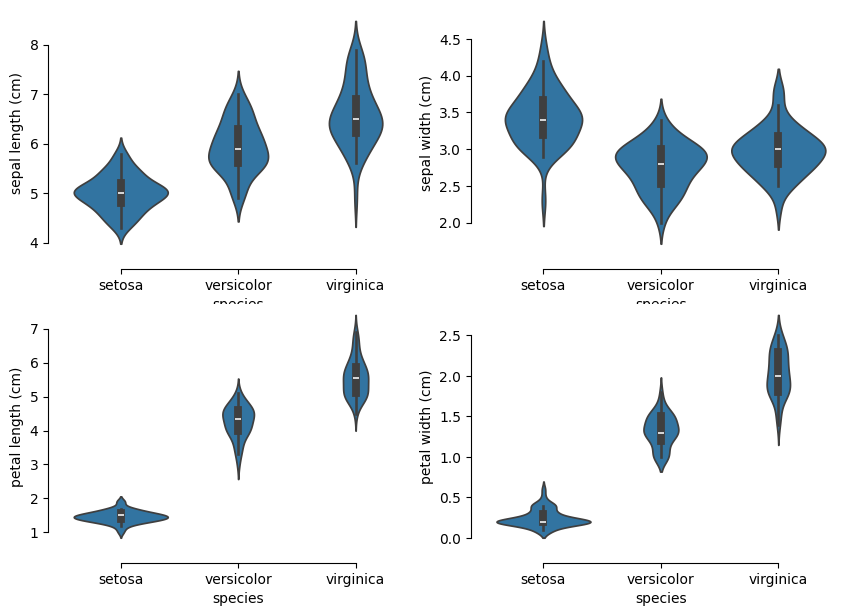

In [242]:
def plot_violin(y2, i):
    #(rows, columns, index of plot)
    plt.subplot(2, 2, i)

    sns.violinplot(x='species', y=y2, data=df)

plt.figure(figsize=(10,7))
i = 1
for feature in df.columns[:-2]:
    plot_violin(feature,i)
    # to remove borders from plots 
    sns.despine(offset=10, trim=True) 
    i += 1

Grazie ai grafici è possibile capire in modo generico quali features sono più discriminanti per l'addestramento (es.: i petali sono piu discriminanti)

FacetGrid è utile per graficare punti in un piano 2d. Un terzo asse di valori può essere rappresentato per mezzo del colore dei singoli punti. row, col, hue indicano i valori del DataFrame da impiegare. Se non si indicano saranno presi le prime dimensioni del DataFrame.

I violin plot sono simili ai box plot, ma mostrano anche la densità di probabilità dei dati, solitamente smoothed con uno KDE (kernel density estimator). Il diagramma include un indicatore per la mediana dei dati, e dell'intervallo interquartile

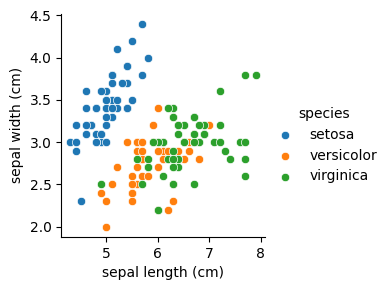

In [364]:

g = sns.FacetGrid(df, hue=df.columns[5])
g.map_dataframe(sns.scatterplot, x=df.columns[0], y=df.columns[1])
g.add_legend()


I punti non sono separabili linearmente... si potrebbe pensare di costruire un nuovo spazio ad alta dimensionalità (es.: kernel method)

train_test_split() è fondamentale per suddividere il dataset in train e test set. Opzioni rilevanti:

shuffle=False: utile per lanciare più volte il notebook ed avere la stessa configurazione per le sperimentazioni
test_size=0.3

(Possibili input: lists, numpy arrays, scipy-sparse matrices e DataFrames)

In [341]:
X = df[[df.columns[0], df.columns[1], df.columns[2], df.columns[3]]]
y = df[df.columns[4]]

# Splitting data into 70% training and 30% test data:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
# bincount: Count number of occurrences of each value in array of non-negative ints
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

X[:3]

Labels counts in y: [50 50 50]
Labels counts in y_train: [36 32 37]
Labels counts in y_test: [14 18 13]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


Ora usiamo una Multinomial logistic regression, che impiega la logistic function 1/(1+e^-x) per convertire l'output in probabilità in uno scenario non binario (cioè multiclasse).
(una LinearRegression() non sarebbe opportuna dato che l'output non è binario)

In [342]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

# Making predictions
y_pred = lr.predict(X_test)

y_pred[:10]

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2])

Dopo aver addestrato il modello ed effettuate le predizioni bisogna valutare il modello

In [343]:
# Valutazione performace

# MAE: la media di degli errori assoluti accumulati, cioè
# la distanza media assoluta tra i dati reali e i dati previsti.
# Non c'è penalizzazione degli errori più "importanti".
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# MSE: la media dei quadrati degli errori, ovvero la differenza media
# al quadrato tra i valori stimati e il valore effettivo.
print('Mean Squared Error:', (root_mean_squared_error(y_test,y_pred))**2)
# RMSE = SQRT di MSE
print('Root Mean Squared Error:', root_mean_squared_error(y_test,y_pred))

# Accuracy in termini di istanze correttamente classificate
print('\nAccuracy (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred,normalize=False)) # keep the order of variables
print('Accuracy normalizzata (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred)) # keep the order of variables
# in alternativa impieghiamo score()
print('Accuracy (via model.score): %.3f' % lr.score(X_test, y_test)) # keep the order of variables

# Numero di istanze classificate in modo non corretto (solo per classificazione)
print('\nMisclassified examples: %d' % (y_test != y_pred).sum()) # keep the order of variables

Mean Absolute Error: 0.022222222222222223
Mean Squared Error: 0.022222222222222223
Root Mean Squared Error: 0.14907119849998599

Accuracy (via accuracy_score): 44.000
Accuracy normalizzata (via accuracy_score): 0.978
Accuracy (via model.score): 0.978

Misclassified examples: 1


Addestriamo nuovamente il modello con X standardizzate.

Il fit viene fatto solo sui dati di train... una volta diviso il dataset conviene "lasciare il test-set in pace" (i parametri estratti con 'fit' vanno usati per gli eventuali ulteriori dataset).
Notare come lo scaler non lo applichiamo all'intero dataset, ma solo ai dati in input. L'output non deve essere sottoposto a normalizzazione (altrimenti non avremo più l'output desiderato).

In [311]:
# Standardizing the features:

# StandardScaler: Standardize features by removing the mean and scaling to unit variance.

sc = StandardScaler()

# Estrae i parametri necessari per standardizzare il dataset
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_test_std[:3]

array([[-1.05669938e-15,  2.30740390e+00, -1.42579845e+00,
        -1.27095115e+00],
       [-8.32816412e-01, -1.29077545e+00, -4.14631819e-01,
        -1.16096500e-01],
       [ 9.51790185e-01, -9.13823325e-02,  3.71831115e-01,
         2.68855052e-01]])

In [312]:
lr = LogisticRegression()

# Perché non standardizziamo anche gli y?
lr.fit(X_train_std, y_train)

# Making Predictions
y_pred = lr.predict(X_test_std)


In [313]:
# Valutazione performace

# MAE.
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# MSE
print('Mean Squared Error:', (root_mean_squared_error(y_test,y_pred))**2)
# RMSE = SQRT di MSE
print('Root Mean Squared Error:', root_mean_squared_error(y_test,y_pred))

# Accuracy in termini di istanze correttamente classificate
print('\nAccuracy (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred,normalize=False))
print('Accuracy normalizzata (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred))
# in alternativa impieghiamo score()
print('Accuracy (via model.score): %.3f' % lr.score(X_test_std, y_test))

# Numero di istanze classificate in modo non corretto
print('\nMisclassified examples: %d' % (y_test != y_pred).sum())

Mean Absolute Error: 0.044444444444444446
Mean Squared Error: 0.044444444444444446
Root Mean Squared Error: 0.21081851067789195

Accuracy (via accuracy_score): 43.000
Accuracy normalizzata (via accuracy_score): 0.956
Accuracy (via model.score): 0.956

Misclassified examples: 2


In questo caso la standardizzazione non ha migliorato l'accuraccy... è peggiorata!

Ora proviamo a impiegare le 2 caratteristiche dei sepali e una sola dei petali.
In alcuni casi, rimuovere feature altamente correlate rende il modello maggiormente robusto e generalizzabile.

In [318]:
print('Removing feature: ' + df.columns[3])

X = df[[df.columns[0], df.columns[1], df.columns[2]]]
y = df[df.columns[4]]

print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))



Removing feature: petal width (cm)
     sepal length (cm)  sepal width (cm)  petal length (cm)
0                  5.1               3.5                1.4
1                  4.9               3.0                1.4
2                  4.7               3.2                1.3
3                  4.6               3.1                1.5
4                  5.0               3.6                1.4
..                 ...               ...                ...
145                6.7               3.0                5.2
146                6.3               2.5                5.0
147                6.5               3.0                5.2
148                6.2               3.4                5.4
149                5.9               3.0                5.1

[150 rows x 3 columns]
Labels counts in y: [50 50 50]
Labels counts in y_train: [36 32 37]
Labels counts in y_test: [14 18 13]


In [302]:
lr = LogisticRegression()

lr.fit(X_train,y_train)

#Making predictions
y_pred = lr.predict(X_test)

In [303]:
# Valutazione performace

# MAE.
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# MSE
print('Mean Squared Error:', (root_mean_squared_error(y_test,y_pred))**2)
# RMSE = SQRT di MSE
print('Root Mean Squared Error:', root_mean_squared_error(y_test,y_pred))

# Accuracy in termini di istanze correttamente classificate
print('\nAccuracy (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred,normalize=False))
print('Accuracy normalizzata (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred))
# in alternativa impieghiamo score()
print('Accuracy (via model.score): %.3f' % lr.score(X_test, y_test))

# Numero di istanze classificate in modo non corretto
print('\nMisclassified examples: %d' % (y_test != y_pred).sum())

Mean Absolute Error: 0.022222222222222223
Mean Squared Error: 0.022222222222222223
Root Mean Squared Error: 0.14907119849998599

Accuracy (via accuracy_score): 44.000
Accuracy normalizzata (via accuracy_score): 0.978
Accuracy (via model.score): 0.978

Misclassified examples: 1


Addestriamo nuovamente il modello con X standardizzate.

In [319]:
# Standardizing the features:

sc = StandardScaler()

sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_test_std[:3]

array([[-1.05669938e-15,  2.30740390e+00, -1.42579845e+00],
       [-8.32816412e-01, -1.29077545e+00, -4.14631819e-01],
       [ 9.51790185e-01, -9.13823325e-02,  3.71831115e-01]])

In [320]:
lr = LogisticRegression()

lr.fit(X_train_std,y_train)

#Making predictions
y_pred = lr.predict(X_test_std)

In [321]:
# Valutazione performace

# MAE.
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

# MSE
print('Mean Squared Error:', (root_mean_squared_error(y_test,y_pred))**2)
# RMSE = SQRT di MSE
print('Root Mean Squared Error:', root_mean_squared_error(y_test,y_pred))

# Accuracy in termini di istanze correttamente classificate
print('\nAccuracy (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred,normalize=False))
print('Accuracy normalizzata (via accuracy_score): %.3f' % accuracy_score(y_test, y_pred))
# in alternativa impieghiamo score()
print('Accuracy (via model.score): %.3f' % lr.score(X_test_std, y_test))

# Numero di istanze classificate in modo non corretto
print('\nMisclassified examples: %d' % (y_test != y_pred).sum())

Mean Absolute Error: 0.08888888888888889
Mean Squared Error: 0.08888888888888889
Root Mean Squared Error: 0.29814239699997197

Accuracy (via accuracy_score): 41.000
Accuracy normalizzata (via accuracy_score): 0.911
Accuracy (via model.score): 0.911

Misclassified examples: 4


Anche in questo caso l'accuracy è scesa.

I classificatori binari determinano essenzialmente se un'istanza appartiene a una certa classe (classe positiva) o no (classe negativa). Questa decisione si basa fondamentalmente su una condizione nello spazio delle caratteristiche, delimitata regioni di decisione. Il confine decisionale diventa quindi la soglia che distingue le diverse classi nello spazio dei dati.

Nella logistic regression, la probabilità che un'istanza appartenga alla classe positiva è modellata con una funzione logistica e una combinazione lineare delle sue caratteristiche. Pertanto, il confine decisionale consiste nell'insieme di punti in cui tale probabilità è pari a 0,5. In un semplice modello di regressione logistica binaria con due caratteristiche, la formula del confine decisionale diventa: 0 = β0 + β1x1 + β2x2, dove β0, β1, β2 sono i parametri del modello e x1 e x2 sono le due caratteristiche.

La function plot_decision_regions() crea un diagramma 2d con tali regioni, e si estende agli scenari multi-class.

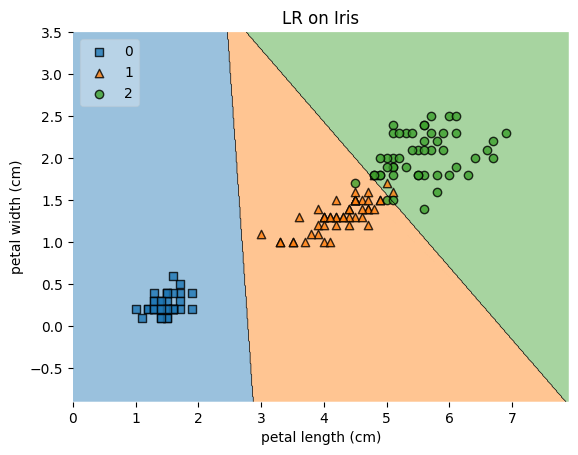

In [362]:
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# Training a classifier
lr = LogisticRegression()
lr.fit(X, y)

# from mlxtend.plotting import plot_decision_regions

# Plotting decision regions
plot_decision_regions(X, y, clf=lr, legend=2)

# Adding axes annotations
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.title('LR on Iris')
plt.show()